## Joint TCR analysis

In [69]:
adata_TCR = adata_all[adata_all.obs['chain_pairing'].isin(["single pair", "extra VJ","extra VDJ","two full chains"]),:]

In [70]:
adata_ab = adata_TCR[adata_TCR.obs['general type'].isin(['TCRab CD4','TCRab CD8aa','TCRab CD8ab']),:]

In [71]:
adata_ab.obs['clone_code'] = adata_ab.obs['TRAV'].astype(str).map(str)+' '+adata_ab.obs['TRBV'].astype(str).map(str)+' '+adata_ab.obs['cdr3a'].astype(str).map(str)+' '+ adata_ab.obs['cdr3b'].astype(str).map(str)

### Assign clones

In [72]:
adata3 = adata_ab[adata_ab.obs['batch'] == '3',:]
adata4 = adata_ab[adata_ab.obs['batch'] == '4',:]
adata5 = adata_ab[adata_ab.obs['batch'] == '5',:]

In [73]:
adatas=[adata3,adata4,adata5]
for i in range(3):
    adatas[i].obs['clone'] = adatas[i].obs.groupby('clone_code').ngroup().astype('str')
    adatas[i].obs['clone']='clone '+ adatas[i].obs['clone'].astype(str).map(str)

###  identify top expanded clones in each tissue

In [74]:
for i in [0,1,2]:
    for j in set( adatas[i].obs['tissue']):
        adata_t = adatas[i][adatas[i].obs['tissue']==j,:]
        counts = pd.DataFrame(adata_t.obs['clone'].value_counts())
        #cut_id = int(np.ceil(0.05*len(pd.DataFrame(adata_t.obs['clone'].value_counts()))))
        counts['count'][0:10] = '1-10'
        counts['count'][10:100] = '11-100'
        counts['count'][100:] = '100+'
        
        adatas[i].obs[j+' top clones'] = adatas[i].obs['clone']
        for cloneid in set(adata_t.obs['clone']):
            adatas[i].obs = adatas[i].obs.replace({j+' top clones' : { cloneid: counts.loc[cloneid,'count']}})
        adatas[i].obs[j+' top clones'][adatas[i].obs['tissue']!=j] = ''

In [75]:
for i in [0,1,2]:
    for j in set( adatas[i].obs['tissue']):
        adata_t = adatas[i][adatas[i].obs['tissue']==j,:]
        print(adata_t.obs.groupby([j+' top clones'])['general type'].value_counts())

PB top clones  general type
1-10           TCRab CD8ab       73
               TCRab CD4         14
100+           TCRab CD4       1727
               TCRab CD8ab      730
11-100         TCRab CD8ab      103
               TCRab CD4         60
Name: count, dtype: int64
LP top clones  general type
1-10           TCRab CD4         84
               TCRab CD8ab        9
               TCRab CD8aa        0
100+           TCRab CD4       2457
               TCRab CD8ab      241
               TCRab CD8aa       32
11-100         TCRab CD4        233
               TCRab CD8ab       21
               TCRab CD8aa       19
Name: count, dtype: int64
IEL top clones  general type
1-10            TCRab CD8ab      141
                TCRab CD4         30
100+            TCRab CD8ab     1172
                TCRab CD4        919
11-100          TCRab CD8ab      318
                TCRab CD4         69
Name: count, dtype: int64
L top clones  general type
1-10          TCRab CD8aa      302
             

### fraction to top clones 

In [364]:
plt.rcParams.update(plt.rcParamsDefault)

In [365]:
# Create a figure with 2x2 subplots
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = [12,7.5]


# Plot on each subplot
for cds in [['TCRab CD4'],['TCRab CD8ab','TCRab CD8aa']]:
    fig, axs = plt.subplots(3, 4)
    for i in range(3):
        adata_cds = adatas[i][adatas[i].obs['general type'].isin(cds),:]
        for k in range(4):
            j = list(set(adata_cds.obs['tissue'])) [k]
            patches, texts, autotexts =axs[i, k].pie([float(i) for i in pd.DataFrame(adata_cds.obs[j+' top clones'][adata_cds.obs[j+' top clones']!=''].value_counts(normalize=True)).reindex(index = ['1-10','11-100','100+']).values],
                          autopct='%1.2f%%',
                          colors = small_palette,explode=(0.2, 0,0),shadow=True, radius=1.1)
            plt.setp(autotexts, size=8, weight="bold")

    rows = adata_ab.obs['Donor ID'].values.categories.tolist()
    cols = list(set(adata_cds.obs['tissue']))

    for ax, col in zip(axs[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 10),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline')

    for ax, row in zip(axs[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')

    fig.tight_layout()
    fig.subplots_adjust(top=0.8, wspace=0, hspace=0)
    plt.savefig(str(cds)+'_expansion.png',dpi = 300)

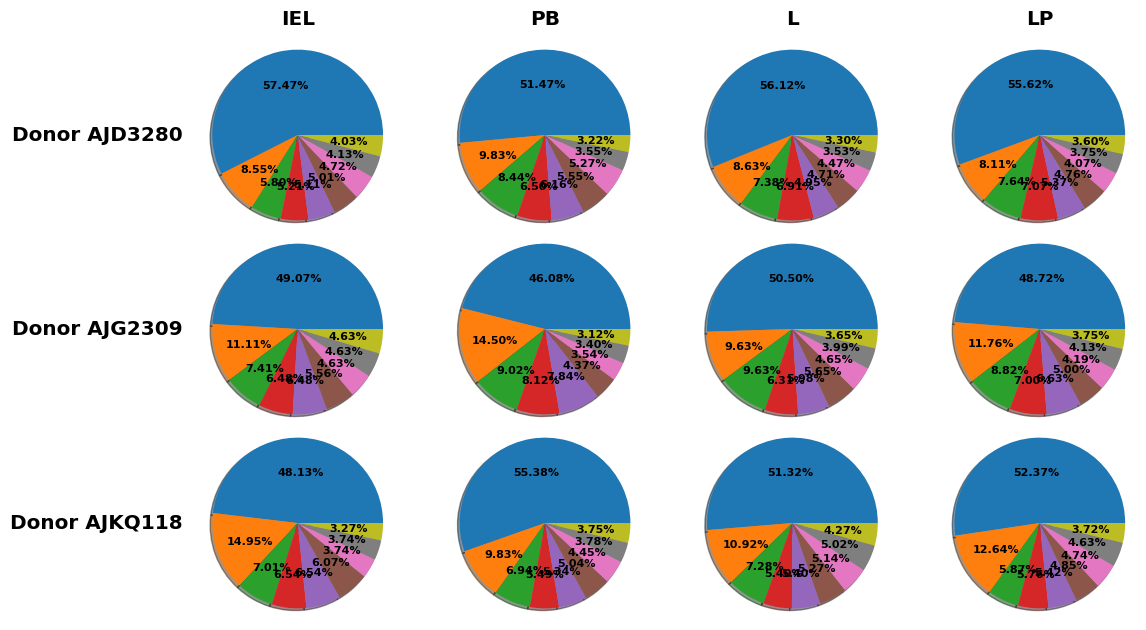

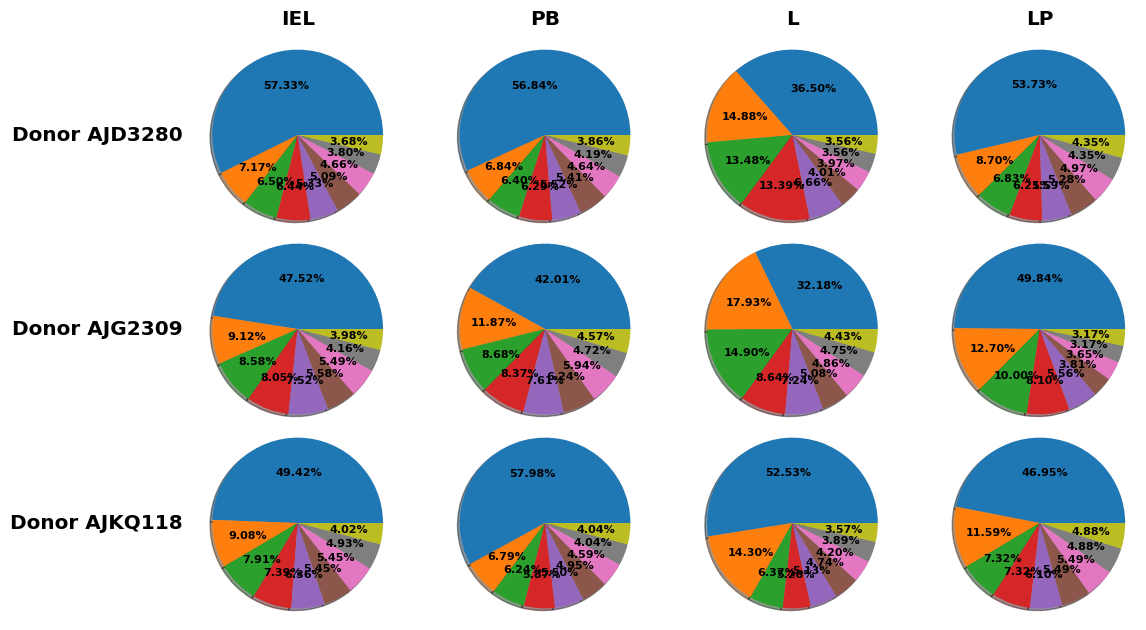

In [65]:
# Create a figure with 2x2 subplots
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = [12,7.5]


# Plot on each subplot
for cds in [['TCRab CD4'],['TCRab CD8ab','TCRab CD8aa']]:
    fig, axs = plt.subplots(3, 4)
    for i in range(3):
        adata_cds = adatas[i][adatas[i].obs['general type'].isin(cds),:]
        for k in range(4):
            j = list(set(adata_cds.obs['tissue'])) [k]
            TRBV = adata_cds.obs['TRBV'].astype(str)
            TRBV_counts = pd.DataFrame(TRBV[adata_cds.obs['tissue']==j].value_counts(normalize=True))
            omit = TRBV_counts[8:].index
            TRBV[TRBV.isin(omit)] = 'other'
            # print(pd.DataFrame(TRBV[adata_cds.obs['tissue']==j].value_counts(normalize=True)))
            patches, texts, autotexts =axs[i, k].pie([float(i) for i in pd.DataFrame(TRBV[adata_cds.obs['tissue']==j].value_counts(normalize=True)).values],
                          autopct='%1.2f%%',shadow=True, radius=1.1)
            plt.setp(autotexts, size=8, weight="bold")

    rows = adata_ab.obs['Donor ID'].values.categories.tolist()
    cols = list(set(adata_cds.obs['tissue']))

    for ax, col in zip(axs[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 10),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline')

    for ax, row in zip(axs[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')

    fig.tight_layout()
    fig.subplots_adjust(top=0.8, wspace=0, hspace=0)
    #plt.savefig(str(cds)+'_expansion.png',dpi = 300)

In [366]:
plt.rcParams.update({'font.size': 12, 'font.weight': 'heavy','axes.linewidth':2,'figure.figsize':[8.2,8]})
celltype_tot = adata_all.obs['celltype'].values.categories.tolist()
for k in [0,1,2]:
    for j in set( adata_all.obs['tissue']):
            expand_celltype = pd.DataFrame()
            adata_t = adatas[k][adatas[k].obs['tissue'] == j, :]
            for i in ['1-10','11-100','100+']:
                pdtemp = pd.DataFrame(adata_t.obs['celltype'][adata_t.obs[j+' top clones'] == i].value_counts(normalize = True))
                pdtemp = pdtemp.rename({'proportion':i}, axis='columns')
                expand_celltype = pd.concat([expand_celltype, pdtemp], ignore_index=False, axis=1)
            expand_celltype = expand_celltype.reindex(index =celltype_tot)
            expand_celltype.transpose().plot.bar(stacked=True,color = celltype_palette,fontsize = 20,title = adata_all.obs['Donor ID'].values.categories.tolist()[k] + ' '+j).legend(loc='center left',bbox_to_anchor=(1.0, 0.5),fontsize = 15)
            plt.tight_layout()
            plt.savefig('expansion_celltype_BreakDowntissue_'+j+'_'+ adata_all.obs['Donor ID'].values.categories.tolist()[k]+'.png',dpi = 300)

### DE between large clone TRM and small clone TRM

In [77]:
def DE_to_df(_adata, rank_key, _padj_thresh=0.05, _logfc_thresh=1):
    def process_genes(i, direction):
        _log2foldmask = (_adata.uns[rank_key]['logfoldchanges'][i].astype('double') >= _logfc_thresh) if direction == "up" else (_adata.uns[rank_key]['logfoldchanges'][i].astype('double') <= -_logfc_thresh)
        _pvalmask = _adata.uns[rank_key]['pvals_adj'][i].astype('double') <= _padj_thresh
        _additional = pd.DataFrame({
            i: _adata.uns[rank_key]['names'][i].astype('str')[_log2foldmask & _pvalmask],
            'logfoldchanges_'+i: np.abs(_adata.uns[rank_key]['logfoldchanges'][i].astype('double')[_log2foldmask & _pvalmask])
        })
        _ribo_gene_mask = [gene.startswith('RPL') or gene.startswith('RPS') for gene in _additional[i]]
        _mt_gene_mask = [gene.startswith('MT-') for gene in _additional[i]]
        if len(_ribo_gene_mask)>0 and len(_mt_gene_mask)>0:
            _drop_id = np.array(np.array(_ribo_gene_mask) | np.array(_mt_gene_mask))
            _additional = _additional.sort_values(by='logfoldchanges_'+i, ascending=False)
            _additional = _additional.iloc[_drop_id==False, :].reset_index(drop=True)
        return _additional

    _pass_genes_up = pd.DataFrame()
    _pass_genes_down = pd.DataFrame()

    for i in set(_adata.uns[rank_key]['pvals_adj'].dtype.names):

        _pass_genes_up = pd.concat([_pass_genes_up, process_genes(i, "up")[i]], ignore_index=False, axis=1)
        _pass_genes_down = pd.concat([_pass_genes_down, process_genes(i, "down")[i]], ignore_index=False, axis=1)

    return _pass_genes_up, _pass_genes_down

In [96]:
def get_df_from_rank(adata, rank_key):
        df = pd.DataFrame(index = adata.uns[rank_key]['names']['True'], columns = ['log2fold','pval_adj'])
        df['log2fold'] = adata.uns[rank_key]['logfoldchanges']['True'].astype('double')
        df['pval_adj'] = adata.uns[rank_key]['pvals_adj']['True'].astype('double')
        return df

In [102]:
TRM_expansion_DE = dict()
for gtype in ['TCRab CD4','TCRab CD8ab','TCRaa CD8aa']:
    for j in set( adata_all.obs['tissue']):
        for i in range(0,3):
            adata_temp = adatas[i][adatas[i].obs['general type']==gtype,:]
            adata_t = adata_temp[adata_temp.obs['tissue'] == j, :]
            for ct in set(adata_t.obs['general subtype']):
                TRM_expansion_DE[' '.join([adata_t.obs['Donor ID'][0],j,gtype,ct])] = dict()
                
                TRM_cd_t_specific = adata_t[adata_t.obs['general subtype'] == ct,:]      
                TRM_cd_t_specific = TRM_cd_t_specific[TRM_cd_t_specific.obs[j+' top clones'].isin(['1-10','100+']),:]
                TRM_cd_t_specific.obs['top10_or_not']= TRM_cd_t_specific.obs[j+' top clones'] =='1-10'
                TRM_cd_t_specific.obs['top10_or_not']= TRM_cd_t_specific.obs['top10_or_not'].astype(str)
                if TRM_cd_t_specific.obs['top10_or_not'].tolist() == [] or sum(TRM_cd_t_specific.obs['top10_or_not']=='True') <10:
                    print(' '.join([gtype,j,str(i),ct]), 'has no top clone')
                    continue
                else:
                    if 10*sum(TRM_cd_t_specific.obs['top10_or_not']=='True') <sum(TRM_cd_t_specific.obs['top10_or_not']=='False'):
                        print(' '.join([gtype,j,str(i),ct]), 'is not balance')
                        continue
                    else:
                        print(' '.join([gtype,j,str(i),ct]), 'running DE...')
                        print(sum(TRM_cd_t_specific.obs['top10_or_not']=='True'))
                        print(sum(TRM_cd_t_specific.obs['top10_or_not']=='False'))
                        sc.tl.rank_genes_groups(TRM_cd_t_specific, groupby='top10_or_not', key_added='rank_top10_or_not',method = 'wilcoxon')
                        deg_df  = get_df_from_rank(TRM_cd_t_specific, rank_key='rank_top10_or_not')
                        deg_df.to_csv('_'.join([gtype,j,str(i),ct,'_DE_df.csv']).replace('/','_'))
                        pass_genes_up, pass_genes_down = DE_to_df(TRM_cd_t_specific, rank_key='rank_top10_or_not', _padj_thresh = 0.05, _logfc_thresh = 1)
                        print(pass_genes_up)
                        try:
                            if pass_genes_up['True'].tolist() != []:
                                TRM_expansion_DE[' '.join([adata_t.obs['Donor ID'][0],j,gtype,ct])]['1-10'] = pass_genes_up['True'].tolist()
                            if pass_genes_up['False'].tolist() != []:
                                TRM_expansion_DE[' '.join([adata_t.obs['Donor ID'][0],j,gtype,ct])]['100+'] = pass_genes_up['False'].tolist()
                        except:
                            continue

TCRab CD4 PB 0 FOXP3+ Treg is not balance
TCRab CD4 PB 0 Naive/TCM has no top clone
TCRab CD4 PB 0 TCM has no top clone
TCRab CD4 PB 1 FOXP3+ Treg has no top clone
TCRab CD4 PB 1 Naive/TCM has no top clone
TCRab CD4 PB 1 TCM has no top clone
TCRab CD4 PB 2 FOXP3+ Treg is not balance
TCRab CD4 PB 2 Naive/TCM has no top clone
TCRab CD4 PB 2 TCM has no top clone
TCRab CD4 LP 0 Naive/TCM has no top clone
TCRab CD4 LP 0 Tph running DE...
27
192
      True False
0    TRAV4   NaN
1  HLA-DRA   NaN
TCRab CD4 LP 0 FOXP3+ Treg has no top clone
TCRab CD4 LP 0 Mobile TRM has no top clone
TCRab CD4 LP 0 TRM is not balance
TCRab CD4 LP 0 Poised TCM has no top clone
TCRab CD4 LP 1 Naive/TCM has no top clone
TCRab CD4 LP 1 Tph has no top clone
TCRab CD4 LP 1 FOXP3+ Treg has no top clone
TCRab CD4 LP 1 Mobile TRM has no top clone
TCRab CD4 LP 1 TRM is not balance
TCRab CD4 LP 1 Poised TCM has no top clone
TCRab CD4 LP 2 Naive/TCM has no top clone
TCRab CD4 LP 2 Tph has no top clone
TCRab CD4 LP 2 FOXP3+

In [41]:
import math
def is_nan(value):
    return isinstance(value, float) and math.isnan(value)

TRM_expansion_DE_a = {k: v for k, v in TRM_expansion_DE.items() if v}
for key, subdict in TRM_expansion_DE_a.items():
    for subkey, sublist in subdict.items():
        subdict[subkey] = [item for item in sublist if not is_nan(item)]

data = []

# Loop through the dictionary and flatten it
for cell_type, genes in TRM_expansion_DE.items():
    for category in ['1-10', '100+']:
        for gene in genes.get(category, []):
            data.append([cell_type, gene])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['cell type', 'gene'])
print(df)
#print(df.groupby(['cell type'])['gene'].value_counts())#('gene')['cell type'].value_counts())#apply(set)['GPR183'])
df_drop = df.drop_duplicates(subset = 'gene')
keep_id = [i.startswith('TR')==0 and i.startswith('CD8')==0 for i in df_drop['gene']]
df_drop = df_drop.iloc[keep_id,:]
result_dict = df_drop.groupby('cell type')['gene'].apply(list).to_dict()
print(result_dict)

                            cell type        gene
0       Donor AJKQ118 L TCRab CD4 TRM      TRAV19
1       Donor AJKQ118 L TCRab CD4 TRM    TRAV12-3
2       Donor AJKQ118 L TCRab CD4 TRM       TRBC2
3       Donor AJKQ118 L TCRab CD4 TRM      LGALS1
4       Donor AJKQ118 L TCRab CD4 TRM        NME2
5      Donor AJD3280 LP TCRab CD4 Tph       TRAV4
6      Donor AJD3280 LP TCRab CD4 Tph     HLA-DRA
7   Donor AJD3280 IEL TCRab CD8ab TRM    TRAV13-2
8   Donor AJG2309 IEL TCRab CD8ab TRM     TRBV6-5
9   Donor AJG2309 IEL TCRab CD8ab TRM   TRAV14DV4
10  Donor AJG2309 IEL TCRab CD8ab TRM       TRBC1
11  Donor AJKQ118 IEL TCRab CD8ab TRM      TRBV28
12  Donor AJKQ118 IEL TCRab CD8ab TRM   LINC02446
13  Donor AJKQ118 IEL TCRab CD8ab TRM        CD8A
14  Donor AJKQ118 IEL TCRab CD8ab TRM        CD8B
15  Donor AJKQ118 IEL TCRab CD8ab TRM       SPRY1
16  Donor AJKQ118 IEL TCRab CD8ab TRM      GPR183
17  Donor AJKQ118 IEL TCRab CD8ab TRM       PDE4B
18  Donor AJG2309 PB TCRab CD8ab Teff       TRGV9


In [42]:
keep_id = [i.startswith('TR')==0 and i.startswith('CD8')==0 for i in df['gene']]
df = df.iloc[keep_id,:]
df

,cell type,gene
3,Donor AJKQ118 L TCRab CD4 TRM,LGALS1
4,Donor AJKQ118 L TCRab CD4 TRM,NME2
6,Donor AJD3280 LP TCRab CD4 Tph,HLA-DRA
12,Donor AJKQ118 IEL TCRab CD8ab TRM,LINC02446
15,Donor AJKQ118 IEL TCRab CD8ab TRM,SPRY1
16,Donor AJKQ118 IEL TCRab CD8ab TRM,GPR183
17,Donor AJKQ118 IEL TCRab CD8ab TRM,PDE4B
19,Donor AJG2309 PB TCRab CD8ab Teff,AC243829.2
20,Donor AJG2309 PB TCRab CD8ab Teff,GZMB
21,Donor AJG2309 PB TCRab CD8ab Teff,IL7R


In [44]:
result_dict.keys()

dict_keys(['Donor AJD3280 LP TCRab CD4 Tph', 'Donor AJG2309 L TCRab CD8ab TRM', 'Donor AJG2309 PB TCRab CD8ab Teff', 'Donor AJKQ118 IEL TCRab CD8ab TRM', 'Donor AJKQ118 L TCRab CD4 TRM', 'Donor AJKQ118 L TCRab CD8ab TRM', 'Donor AJKQ118 PB TCRab CD8ab Teff'])

In [ ]:
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold','axes.linewidth':2})

for gtype in ['TCRab CD4','TCRab CD8ab']:
    for j in set(adata_all.obs['tissue']):
        for i in range(0,3):
            adata_temp = adatas[i][adatas[i].obs['general type']==gtype,:]
            adata_t = adata_temp[adata_temp.obs['tissue'] == j, :]
            for ct in set(adata_t.obs['general subtype']):
                keyname = ' '.join([adata_t.obs['Donor ID'][0],j,gtype,ct])
                if keyname in result_dict.keys():
                    
                    TRM_cd_t_specific = adata_t[adata_t.obs['general subtype'] == ct,:]      
                    TRM_cd_t_specific = TRM_cd_t_specific[TRM_cd_t_specific.obs[j+' top clones'].isin(['1-10','100+']),:]
                    sc.pl.dotplot(TRM_cd_t_specific, result_dict, groupby = j+' top clones' ,
                                  swap_axes = False ,dot_min = 0.1,standard_scale = None, title = keyname)#, save = keyname+'most_expand_DE.png' )

### TRBV fraction in top clone each tissueadata_t

In [ ]:
total_set = list(set(adata_all.obs['TRBV']))
total_set = sorted(total_set[1:]) 

TRBV_dict = dict()
for gtype in ['TCRab CD4','TCRab CD8ab']:
    for j in set(adata_all.obs['tissue']):
        for i in range(0,3):
            adata_temp = adatas[i][adatas[i].obs['general type']==gtype,:]
            adata_t = adata_temp[adata_temp.obs['tissue'] == j, :]
            keyname = ' '.join([adata_t.obs['Donor ID'][0],j,gtype])
            print(keyname)
            print(adata_t.obs['batch'][0])
            TRBV_dict[keyname] = adata_t.obs.groupby([j+' top clones'])['TRBV'].value_counts(normalize = True).unstack(fill_value=0)
            TRBV_dict[keyname] = TRBV_dict[keyname].reindex(index = ['1-10','11-100','100+'])
            
            missing_columns = [col for col in total_set if col not in  TRBV_dict[keyname].columns]
            for col in missing_columns:
                TRBV_dict[keyname][col] = 0
            TRBV_dict[keyname] = TRBV_dict[keyname][total_set]
            TRBV_dict[keyname].to_csv(keyname+'topTRBV.csv')